In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [60]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [61]:
X

array([[ 5.00364209,  8.77402927],
       [ 8.17540851,  8.24911675],
       [ 6.66652317,  9.1238236 ],
       ...,
       [ 9.10208432, -2.09717857],
       [ 8.75562309, -0.42307374],
       [ 6.67515045, -1.67846093]], shape=(1000, 2))

In [62]:
y

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0,
       1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2,

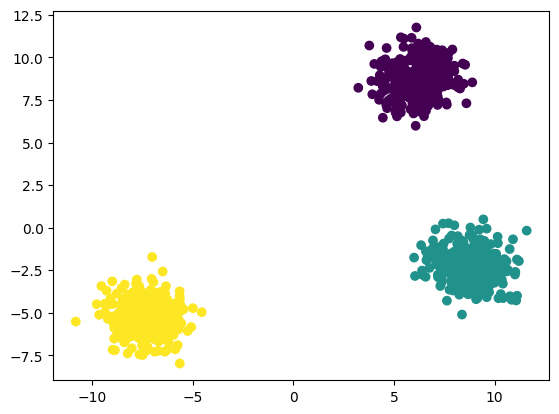

In [63]:
plt.scatter(X[:,0],X[:,1],c=y)

In [64]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_tes=train_test_split(X,y,test_size=0.3,random_state=42)

In [66]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
from sklearn.cluster import KMeans


In [68]:
#elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [69]:
wcss

[1400.0000000000007,
 429.3644440592567,
 29.284481336827966,
 25.8287630008254,
 21.5768891055807,
 18.098815395611943,
 16.530291942805945,
 14.284283152828381,
 13.595769062360638,
 11.685586747708001]

Text(0, 0.5, 'WCSS')

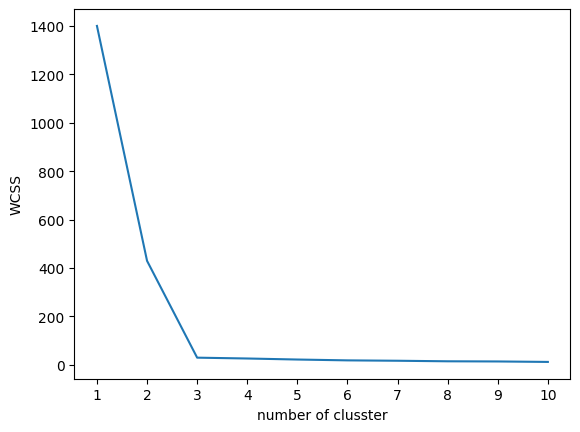

In [70]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusster")
plt.ylabel("WCSS")

In [71]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train_scaled)
y_pred=kmeans.predict(X_test_scaled)

In [73]:
# validating k
from sklearn.metrics import silhouette_score
sil_coff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    sil_coff.append(score)


In [74]:
sil_coff

[0.6966377217651547,
 0.8694758672697123,
 0.6836803640998091,
 0.5030532435299745,
 0.33703789217296576,
 0.5020216443684947,
 0.34387945934654257,
 0.3393353436998547,
 0.336711926425318]